<a href="https://colab.research.google.com/github/snmsndhu/deep_learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(datetime.datetime.now())

2.15.0
2024-02-26 14:52:40.656378


## Creating date to view and fit

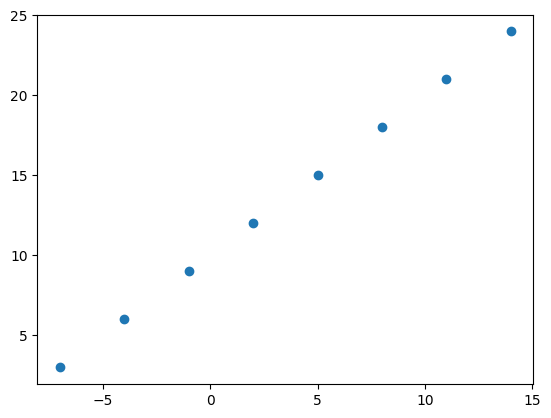

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_ = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y_ = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


plt.scatter(X_, y_);

In [4]:
# Lets create the data using the tensorflow

house_info = tf.constant(["bedroom", "batroom", "garage"])
house_price = tf.constant([9384422])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9384422], dtype=int32)>)

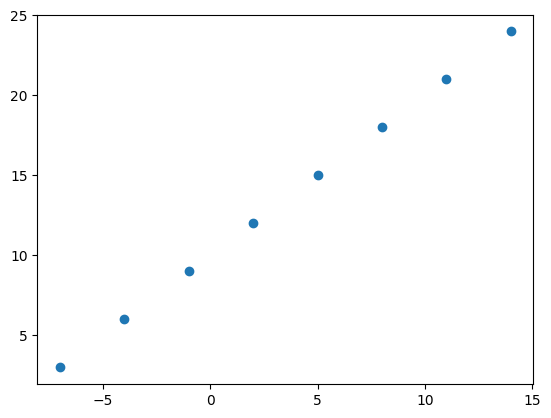

In [5]:
# Create features but this time using with the tensorflow

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y);

In [6]:
# Lets check the shape of the input and output

input_shape = X[0].shape

output_shape = y[0].shape


input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
# Lets train out model

# Set random seed

tf.random.set_seed(42)

# Create a model using the sequentail API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 542ms/step - loss: 9.0689 - mae: 9.0689
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 8.9364 - mae: 8.9364
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.8039 - mae: 8.8039
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.6714 - mae: 8.6714
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 8.5389 - mae: 8.5389


In [8]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 135ms/step


array([[24.547565]], dtype=float32)

In [9]:
# Lets improve our model performance

# Train the model longer

# Set the random seed

tf.random.set_seed(42)

# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile mode (same as above)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)



Epoch 1/100
1/1 [==============================] - 0s 482ms/step - loss: 10.8344 - mae: 10.8344
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7019 - mae: 10.7019
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5694 - mae: 10.5694
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4369 - mae: 10.4369
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3044 - mae: 10.3044
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1719 - mae: 10.1719
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0394 - mae: 10.0394
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9069 - mae: 9.9069
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7744 - mae: 9.7744
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6419 - mae: 9.6419
Epoch 11/100
1/1 [==============================] - 0s 

In [10]:
# Lets predict again

model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[29.82966]], dtype=float32)

In [11]:
# Make a bigger dataset

X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
# Make labels

y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [13]:
# Split the data into the training and test set
len(X)

50

In [14]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

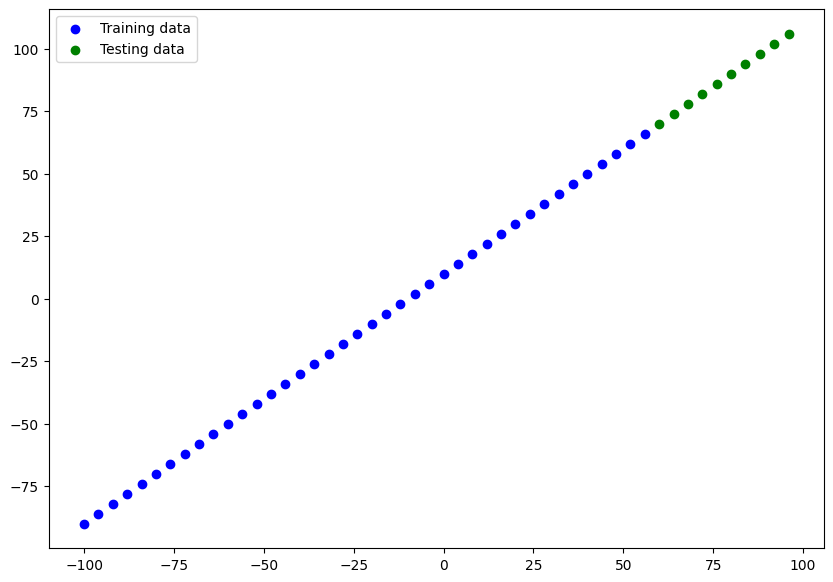

In [15]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", label = 'Training data')
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
plt.legend();

In [16]:
 # Let's train a model

 # Set the random seed

tf.random.set_seed(42)

 # Create a model

model = tf.keras.Sequential([
     tf.keras.layers.Dense(1, input_shape=[1])
 ])

 # Compare model
model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [19]:
model.summary(
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Make the predictions

y_preds = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [21]:
y_preds

array([[56.524338],
       [60.20596 ],
       [63.88758 ],
       [67.56921 ],
       [71.25083 ],
       [74.93245 ],
       [78.614075],
       [82.2957  ],
       [85.97732 ],
       [89.65894 ]], dtype=float32)

In [22]:


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


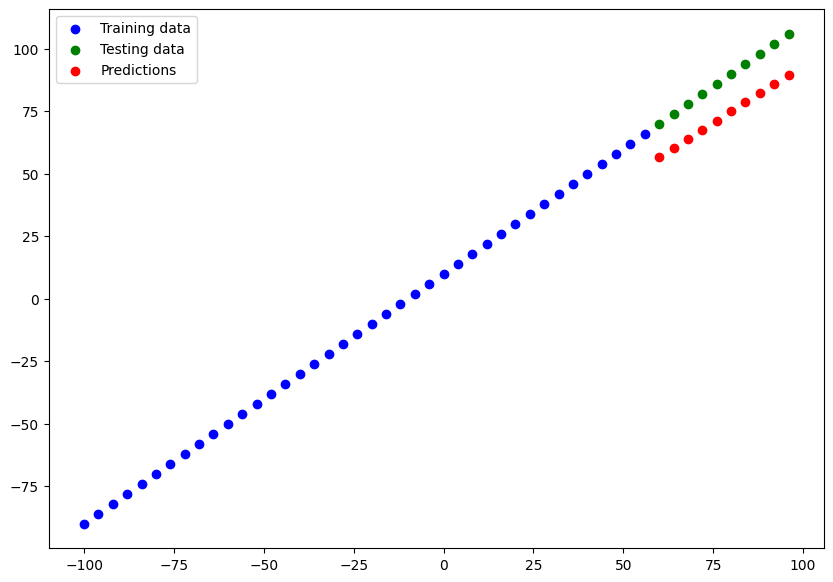

In [23]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)


In [24]:
# Evaluate the model on the test sets

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 146ms/step - loss: 14.9084 - mae: 14.9084


[14.908360481262207, 14.908360481262207]

In [25]:
# Shape before the squeeze
y_preds.shape

(10, 1)

In [26]:
y_preds.squeeze().shape

(10,)

In [27]:
# calculate the MAE

mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.9083605>

In [28]:
# calculate the MSE
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=223.09546>

In [29]:
#  We can also calculate the MAE using the pure TensorFlow functions

# Returns the same as tf.metrics.mean_absolute_error()

tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=14.908359909057618>

In [30]:
# Let make a functions for our evaluation metrics

def mae(y_test, y_pred):

  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):

  return tf.metrics.mean_squared_error(y_test, y_pred)

In [31]:
# We will make 3 different models to run a experiments to improve our models

In [32]:
# Model 1

# Set the random seed

tf.random.set_seed(42)

# Original model without modifications

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 12.8831 - mae: 12.8831
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4228 - mae: 9.4228
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9122 - mae: 11.9122
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2059 - mae: 9.2059
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0607 - mae: 10.0607
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3359 - mae: 9.3359
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4913 - mae: 8.4913
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0360 - mae: 9.0360
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.5566 - mae: 18.5566
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0046 - mae: 10.0046
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - lo

1/1 [==============================] - 0s 46ms/step


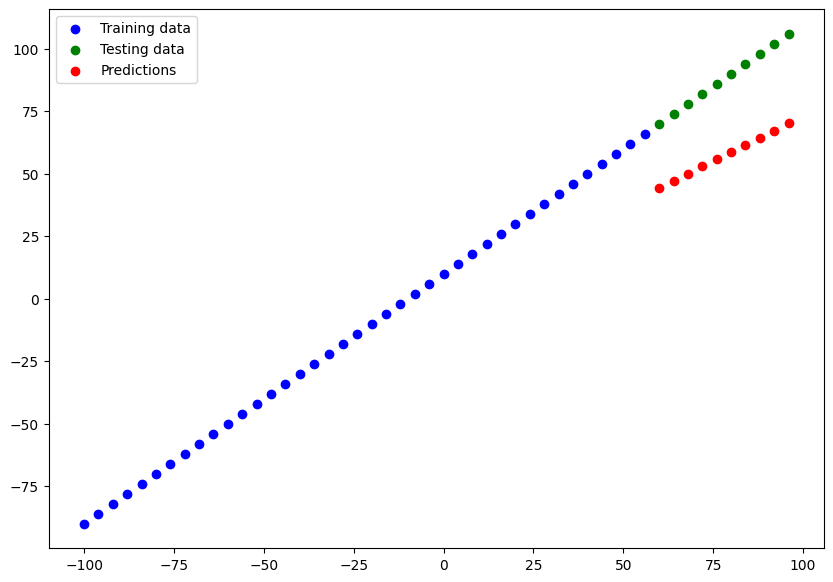

In [33]:
# Make and plot the predications for the model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [34]:
# calculate the MAE and MSE

mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()

mae_1, mse_1

(30.743763, 955.7134)

In [35]:
# Build the model_2

In [36]:
# Set the random seed

tf.random.set_seed(42)

# Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # Adding a second layer in this model to check th performance
])

# Compile the model

model_2.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["mae"])

# Fit the model

model_2.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs = 100, verbose = 0)

1/1 [==============================] - 0s 56ms/step


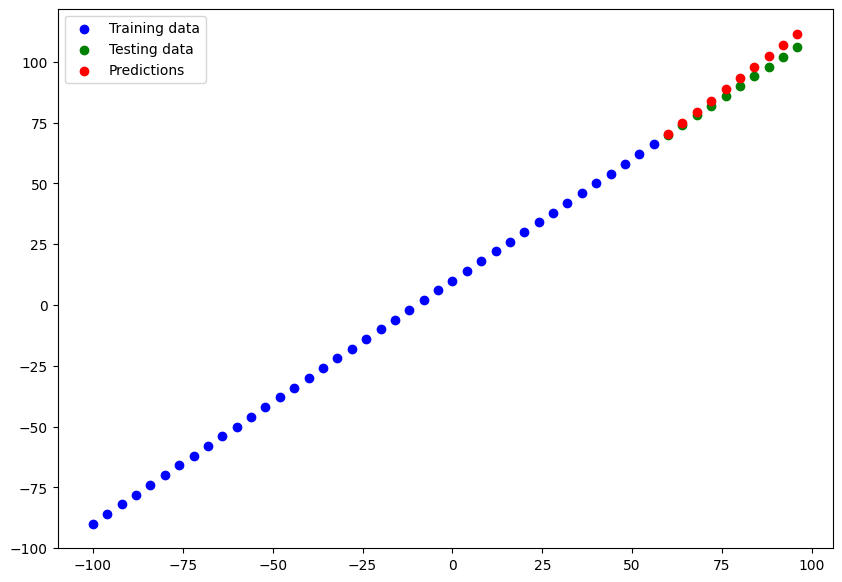

In [37]:
# Make and plot preditions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [38]:
# calculate the mae and mse

mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()

mae_2, mse_2

(2.921987, 11.255819)

In [39]:
# Build a model_3


In [41]:
# Random seed

tf.random.set_seed(42)

# Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit

model_3.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 43ms/step


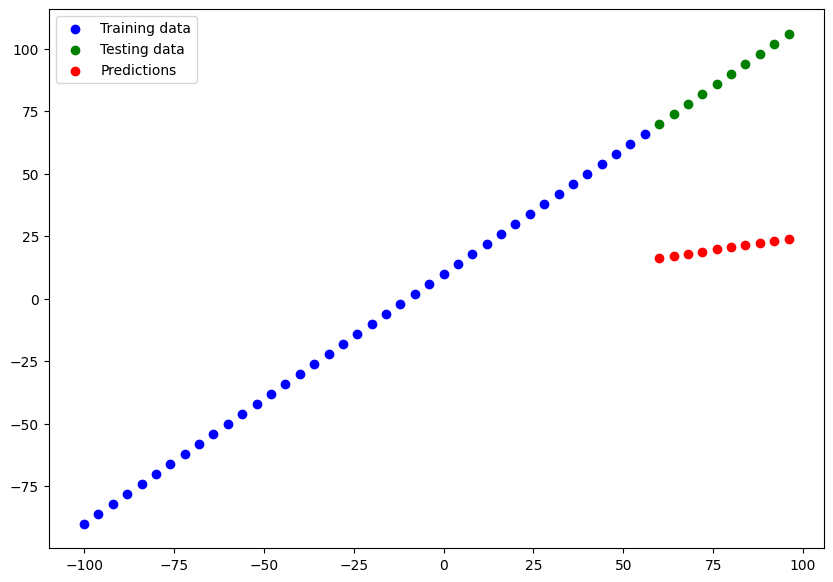

In [43]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3);

In [45]:
# calculate model 3 metrics

mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()

mae_3 , mse_3

(67.8849, 4692.657)

In [46]:
# lets compare the results of all 3 models

In [47]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [49]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.743763,955.713379
1,model_2,2.921987,11.255819
2,model_3,67.884903,4692.657227


In [50]:
# Save a model using the SaveModel format
model_2.save("best_model_SaveModel_format")

In [53]:
# Loading a model
loaded_saved_model = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Downloading a model from google colab

# from google.colab import files
# files.download("best_model_SaveModel_format")